In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns

In this notebook, we're going to do some machine learning.  All of it : 1) classification, 2) regression, 3) clustering.  

We'll go through 
* Defining the test and train data
* For each approach:
 * Fitting a model
 * Assessing the results with different metrics
     * Cross validation
     * ROC
     * and so on
 * Refining the hyperparameters

## Load the data

In [2]:
# import some data to play with
iris = datasets.load_iris()

x = iris.data
y = iris.target
# array version

In [3]:
iris_sb = sns.load_dataset("iris")
iris_sb.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Feature Engineering

[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [-0.65653988 -0.72971237  0.1757674   0.07470647]
 [ 0.58099728 -0.59641809 -0.07252408 -0.54906091]
 [ 0.31725455 -0.32409435 -0.47971899  0.75112056]]
[0.92461621 0.05301557 0.01718514 0.00518309]


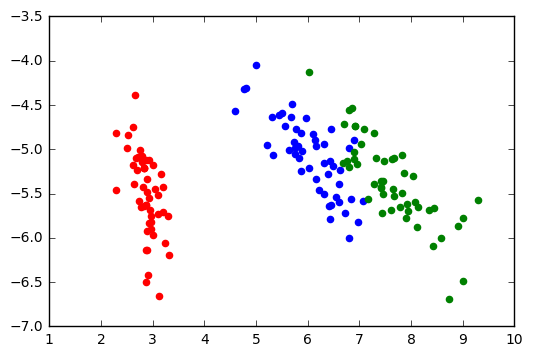

In [31]:
# PCA
from sklearn.decomposition import PCA
import itertools

pca = PCA()
pca.fit(x)
print(pca.components_) # each row is a prin comp
print(pca.explained_variance_ratio_)

w = np.matmul(x, pca.components_[:2,:].transpose())


colors = itertools.cycle(["r", "b", "g"])
plt.figure(1)
for i in range(3):
    plt.scatter(w[y==i,0],w[y==i,1], color=next(colors))
    

[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [-0.65653988 -0.72971237  0.1757674   0.07470647]]


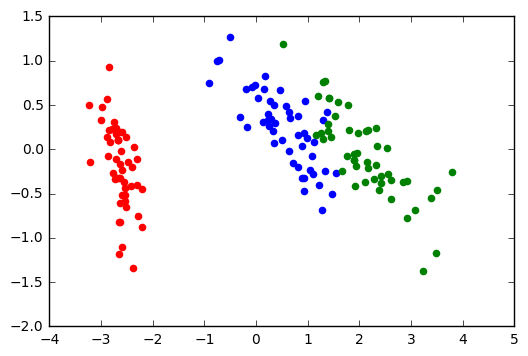

In [32]:
pca = PCA(n_components=2)
pca.fit(x)
print(pca.components_) # each row is a prin comp

w = pca.transform(x) # same as above but rescales 

colors = itertools.cycle(["r", "b", "g"])
plt.figure(1)
for i in range(3):
    plt.scatter(w[y==i,0],w[y==i,1], color=next(colors))
    
# w is the final feature vector

# Clustering

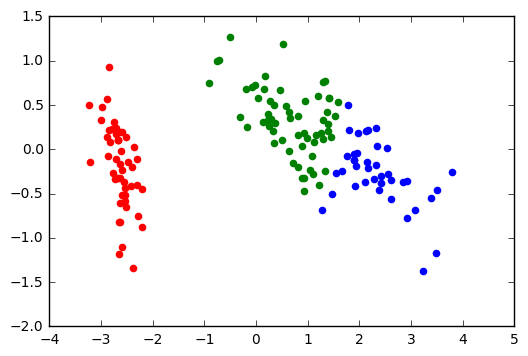

In [44]:
# Kmeans 
from sklearn.cluster import KMeans
    
kmeans = KMeans(n_clusters=3, random_state=0).fit(w)
l = kmeans.labels_
#print(y)
#print(kmeans.labels_)

plt.figure(2)
colors = itertools.cycle(["r", "b", "g"])
for i in range(3):
    plt.scatter(w[l==i,0],w[l==i,1], color=next(colors))

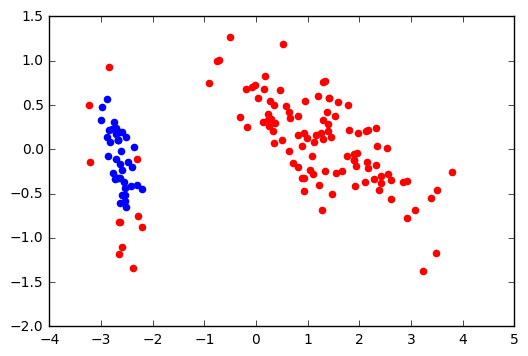

In [52]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=15).fit(w)
#print(db.labels_)
#print(y)
l = db.labels_

plt.figure(2)
colors = itertools.cycle(["r", "b", "g", "k", "m"])
for i in np.unique(l):
    plt.scatter(w[l==i,0],w[l==i,1], color=next(colors))



# Regression

In this section we'll try to predict the 4th feature as if it's a regression problem.

[-0.06560212  0.08174777  0.42227867]
0.11058852944078429
-0.49597599481608556


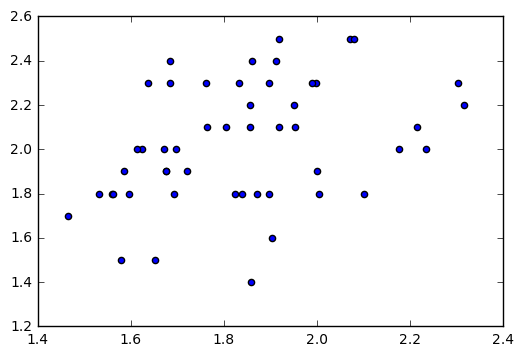

In [70]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

data_train = x[:100,0:3]
result_train = x[:100,3]

data_test = x[100:,0:3]
result_test = x[100:,3]

reg = linear_model.LinearRegression(fit_intercept=True)
reg.fit(data_train, result_train)
print(reg.coef_)

plt.scatter(reg.predict(data_test), result_test)
print(mean_squared_error(result_test, reg.predict(data_test)))
print(r2_score(result_test, reg.predict(data_test)))  # not great, might as well have a horiz line


[ 0.        -0.         0.3345262]
0.19168115179473133
-1.5929488636265807


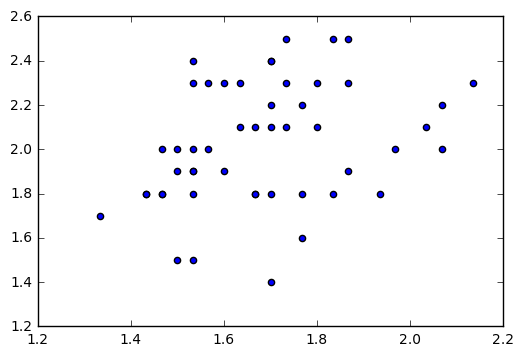

In [75]:
# Ridge and Lasso
# LASSO only

data_train = x[:100,0:3]
result_train = x[:100,3]

data_test = x[100:,0:3]
result_test = x[100:,3]

reg = linear_model.Lasso(alpha = 0.1)
reg.fit(data_train, result_train)
print(reg.coef_)

plt.scatter(reg.predict(data_test), result_test)
print(mean_squared_error(result_test, reg.predict(data_test)))
print(r2_score(result_test, reg.predict(data_test)))  # not great, might as well have a horiz line

# The result is MUCH more sparse, only uses feat 3, but does worse